# Using SymPy for Plotting Geometry

I'm pretty sure not a lot of people have tried to see how one of Euclid's propositions might be diagramed using SymPy's plotting routines and its Geometry package.  There are plenty of nerds reading Euclid, and another fine group using SymPy, but the union of those two sets of people is probably pretty small.

Indeed, the fact that this is such a minority use case probably accounts for the  fact that SymPy doesn't support this nearly as well as it supports some of its core  symbolic math features.  For example, SymPy is great for doing a final spot check on your Calculus I homework answers to make sure the work you did by hand passes muster. (Of course, if you don't suffer from dumb mistakes like copying the problem down wrong or messing up a sign, you don't need it -- but it helps poor drudges like me.)

As we'll see, however, it's still possible to plot "SymPy" geometry using Matplotlib, even if the SymPy plotting support for the geometry package doesn't let us tackle it straightforwardly. We'll get to that shortly, but first, let's say a word or two about why Euclid is cool enough that we've all heard of him.

## Euclid's Geometry

When I'm not learning math formally as [World's Oldest Math Major](/worlds-oldest-math-major/), sometimes I just read about the subject for fun, without any university credit accruing to it. Case in point:  I recently picked up a free public-domain copy of Euclid's elements and started working through it.

Most people know that Euclid's Elements is about geometry, and it represents a sort of proof-based, pure math approach to the subject that begins with a simple set of axioms and then develops proofs of more complex theorems along the way.

What I didn't know before picking up the book was that Euclid also worked through many "propositions".  Like the proofs, propositions start with known axioms and definitions.  Unlike a proof, however, the goal of a proposition is often to do something more or less "practical" (to a student of geometry at least).  That is, they're partly focused on doing a task rather than simply proving a result.

For example, the very first Proposition in Book I of the Elements walks the reader through creating an equilateral triangle, by drawing two circles centered at the endpoints of a horizontal line segment, with the radius of the circle equal to the length of the line segment.  Once this is done, either point where the two circles  intersect can serve as the third vertex of an equilateral triangle.  Moreover, because both circles have the same radius as the line segment AB, then the sides AC and BC are both the same length as AB.

Here we show a recreation of the drawing that appears in the Elements:

![/images/EuclidProposition1.png](/images/EuclidProposition1.png)

When I first read through this proposition, I thought this result was cool enough to merit trying it out in SymPy.  As you may have already guessed from the rather anachronistic set of X and Y axes visible in the image above, I was able to get it to work, but I didn't get there through plotting it in SymPy.

## Enter SymPy

When I tried to reproduce this image in SymPy, I started at the end, so to speak.  That is to say, I began with the SymPy documentation for how to create an equilateral triangle. Here's the code for that part:

```
# Draw an Equilateral triangle (based on SymPy documentation)
vertices = [Point(0,0), Point(10, 0), Point(5, 5 * sqrt(3))]
t = Triangle(*vertices)
```

So far so good. According to the SymPy documentation, that's equilateral.

Now let's plot it.  Again, we consult SymPy's [documentation](https://docs.sympy.org/latest/modules/plotting.html#plotting-geometric-entities), where we learn this:

<blockquote>Plotting polygons (Polygon, RegularPolygon, Triangle) are not supported directly.</blockquote>

Dang. We can't get there from here, at least not "directly". No worries.  Let's take a quick stab at doing it indirectly, along with the imports we'll need for the rest of the task.

Here's the code:

In [1]:
from sympy import  sqrt
from sympy.geometry import Triangle, Circle, Point
from sympy.plotting.plot_implicit import plot_implicit
import numpy as np
import matplotlib.pyplot as plt

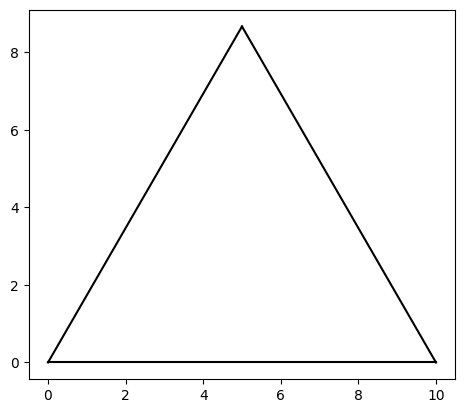

In [2]:
%matplotlib inline

def make_plottable(p1, p2):
    # converts ("flattens") two points to two arrays with x-value, y-value
    return [p1.x, p2.x],[p1.y, p2.y]

# Draw an Equilateral triangle (based on SymPy documentation)
vertices = [Point(0,0), Point(10, 0), Point(5, 5 * sqrt(3))]
t = Triangle(*vertices)

# Get some axes to plot into
f, axes = plt.subplots(1)

# Make our image square rather than the default (rectangular)
axes.set_aspect(1)

# Plot each side using its two endpoints
for side in t.sides:    
    x, y = make_plottable(*side.points)
    axes.plot(x,y, color='black')

As you can see, that's looking pretty equilateral. We'll accept it as a postulate for now that it is.  Now to get our Euclidean diagram, we need to draw a circle.  Let's try to draw the first one.  The documentation says we can do this using plot_implicit.

We need one with the same radius as the bottom line segment.  A reasonable first attempt based on the SymPy documentation is the following:

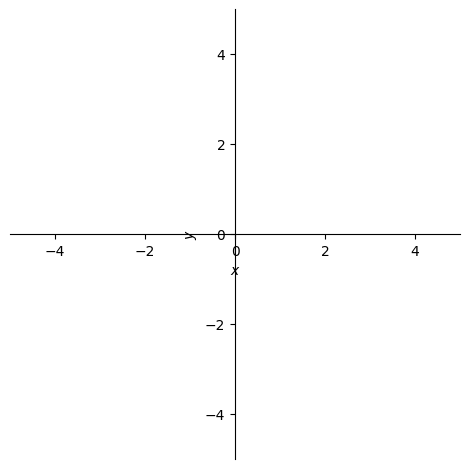

In [3]:
circ1 = Circle(Point(0,0), 10)
_ = plot_implicit(circ1.equation(), aspect_ratio=(1,1))

Being the astute reader that you are, you've naturally noticed the absence of a circle here, where the documentation says there should be one:

<blockquote>The plotting module is capable of plotting some 2D geometric entities like line, circle and ellipse. The following example plots a circle centred at origin and of radius 2 units.

```
from sympy import *
x,y = symbols('x y')
plot_implicit(Eq(x**2+y**2, 4))
```

Similarly, plot_implicit() may be used to plot any 2-D geometric structure from its implicit equation.</blockquote>

I noticed it, too!  "Maybe it's a bug," I thought.  "Let's try some smaller circles."

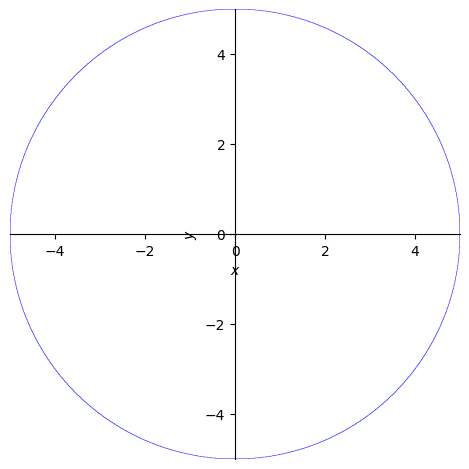

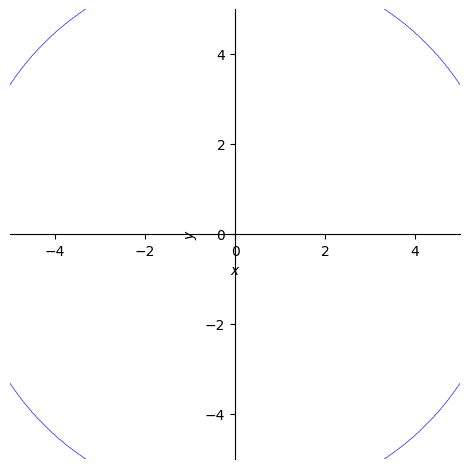

In [4]:
from sympy import symbols
x, y = symbols('x y')
Circle(Point(0,0), 5)
plot_implicit(Circle(Point(0,0), 5).equation(),aspect_ratio=(1,1))
plot_implicit(Circle(Point(0,0), 6).equation(), aspect_ratio=(1,1))

Well, darn.  We can plot_implicit a circle with radius of 5, but we start running into problems at a radius of 6, and by the time we reach 10, our circle has disappeared completely.  (I did manage at one point to set the x and y limits to a larger value, but the problem persisted, so it's not just that the circles are getting cut off).

The documentation notwithstanding, SymPy Circle objects aren't supported directly either. 

OK, well once again, let's see if Matplotlib won't let us work around this.  Here we take our original triangle and add the two circles.

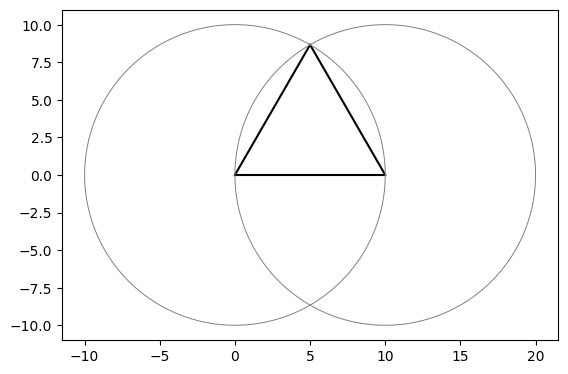

In [5]:
%matplotlib inline

def make_plottable(p1, p2):
    # converts ("flattens") two points to two arrays with x-value, y-value
    return [p1.x, p2.x],[p1.y, p2.y]

# Draw an Equilateral triangle (based on SymPy documentation)
vertices = [Point(0,0), Point(10, 0), Point(5, 5 * sqrt(3))]
t = Triangle(*vertices)

f, axes = plt.subplots(1)
axes.set_aspect(1)

for side in t.sides:    
    x, y = make_plottable(*side.points)
    axes.plot(x,y, color='black')


# Now according to Euclid

# the radius of the two circles == line AB
r = 10

# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 200)

# Left circle
# compute x1 and x2
x = r*np.cos(theta)
y = r*np.sin(theta)
axes.plot(x, y, color="gray", linewidth=".7")

# Right circle
x = r*np.cos(theta) + 10
y = r*np.sin(theta)
_ = axes.plot(x, y, color="gray", linewidth=".7")

I know, that's quite a lot of Matplotlib arm-waving for what Euclid no doubt dispatched quickly with a compass.

Remember when they used to say that computers are labor-saving devices?

Have you noticed they stopped saying that?

OK, cynicism aside, let's take what we've done so far and add the labels we'd need at the end.

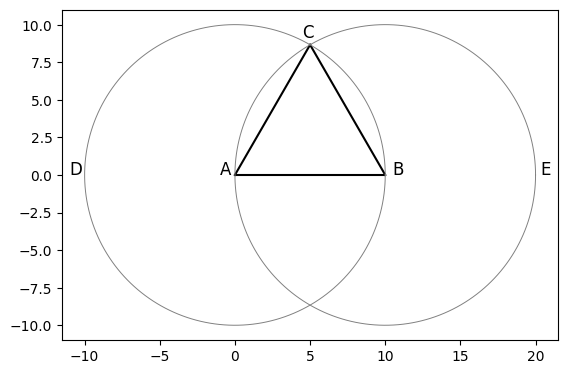

In [6]:
%matplotlib inline

def make_plottable(p1, p2):
    # converts ("flattens") two points to two arrays with x-value, y-value
    return [p1.x, p2.x],[p1.y, p2.y]

# Draw an Equilateral triangle (based on SymPy documentation)
vertices = [Point(0,0), Point(10, 0), Point(5, 5 * sqrt(3))]
t = Triangle(*vertices)

f, axes = plt.subplots(1)
axes.set_aspect(1)

for side in t.sides:    
    x, y = make_plottable(*side.points)
    axes.plot(x,y, color='black')

# Now according to Euclid

# the radius of the two circles == line AB
r = 10

# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 200)

# Left circle
# compute x1 and x2
x = r*np.cos(theta)
y = r*np.sin(theta)
axes.plot(x, y, color="gray", linewidth=".7")

# Right circle
x = r*np.cos(theta) + 10
y = r*np.sin(theta)
axes.plot(x, y, color="gray", linewidth=".7")

# Label vertices
axes.text(-1, 0, "A", fontsize='large')
axes.text(10.5, 0, "B", fontsize='large')
axes.text(4.5, 5 * sqrt(3) + .5, "C", fontsize='large')

# Label circles
axes.text(-11, 0, "D", fontsize='large')
_ = axes.text(20.3, 0, "E", fontsize='large')

There is our completed diagram.  If you want to see how this relates to Euclid's original proposition and its diagram, you can read about those [here](http://aleph0.clarku.edu/~djoyce/elements/bookI/propI1.html).

Let's see how we might demonstrate that the point we originally trusted, (5, 5*sqrt(3)), really is the point of intersection of the two circles, and that the triangle is indeed equilateral.

In [7]:
r = 10
c1 = Circle(vertices[0], r)
c2 = Circle(vertices[1], r)
intersections = c1.intersect(c2)

# Show our intersections:
print("Our intersections are:  ", intersections)
print("Is our apex point one of the intersections:",vertices[2] in list(intersections))

# Are three sides the same?
side_list = [side.length for side in t.sides]
print("Our sides have the same length, as shown here: ", side_list)

Our intersections are:   {Point2D(5, -5*sqrt(3)), Point2D(5, 5*sqrt(3))}
Is our apex point one of the intersections: True
Our sides have the same length, as shown here:  [10, 10, 10]


Finally, what can we say about that apex point? Why does it have the value that it has? In particular, where did that 5 times the square root of three come from?  

If we think about it, we tried to combine three sides of length 10 into a triangle where each angle is 60 degrees.  In radians, 60 degrees is 

$$\frac{\pi}{3}$$

Let's multiply the sin of that value times one of our sides, to see if it makes sense.

In [8]:
from sympy import sin, pi
print(sin(pi/3) * 10)

5*sqrt(3)


SymPy's geometry plotting could be much improved, but you have to love it for symbolic math.